# Trabajo Final de Biología Computacional
## Generación lineas de comando con Biopython para alineamientos de secuencias de ADN con Muscle, Clustalw

### Introducción

La clase Polychaeta, fue descrita por Grube (1950), pertenece al phylum annelida, y sus individuos son comunmente conocidos como Polyquetos. esta clase representa el mayor grupo de invertebrados marinos, pues conforman gran parte del componente biotico de la infauna en este ambiente, tanto cerca de la costa como en las grandes profundidades (alrededor del 70% de todas las especies) (Blake & Hilbig, 1994). Los Poliquetos se encuentran en casi todos los habitat marinos desde zonas intermareales hasta el mar profundo, aunque tambien pueden encontrarse en menor medida en agua dulce, o incluso en zonas continentales (Rouse & Pleijel, 2001). Sin embargo, a pesar de la magnitud del taxòn, su distribucion y diversidad taxonomica aun es muy poco conocida (Carr et al., 2011; Nigren, 2014). Como soporte de esta diversidad  varios ivestigadores han optado por obtener la secuencia del gen citocromo oxidasaI (COI), pues la velocidad de mutacion de este es lo suficientemente rapida para distinguir entre especies cercanamente relacionadas, y por que su secucencia se conserva entre taxones conespecíficos.

Un alineamiento de secuencias es una forma de representar y comparar, dos o mas secuencias o cadenas de ADN, ARN o estructuras primarias proteicas para resaltar sus zonas de simulitud, que podrian indicar relaciones funcionales o evolutivas entre los genes o proteinas consultados. la serie de programas Clustal y  MUSCLE (MUltiple Sequence Comparison by Log-Expectation) se usan  ampliamente en biologia molecular para la alineacion multiple de secuencias de acidos nucleicos y proteinas, y para la preparacion de arboles filogeneticos; Usando estos alineamientos, los biologos pueden estudiar los patrones de secuencia conservados atraves de la evolucion y las relaciones ancestrales entre diferentes organismos (Chenna, 2003; Edgar, 2004).

El objetivo de este trabajo es generar líneas de comando para realizar el alineamiento de secuencias de ADN en Clustalw y MUSCLE.

### Metodología

Se descargaron de BOLD (Barcode Of Life Data System) en formato .fasta, las secuencias del gen COI de 10 individuos de la clase Polychaeta, estas fueron guardadas en un solo documento .fasta, el cual fue alineado en BioPython usando los códigos mostrados a continuación. 

### Resultados

#### Generación línea de comando Clustalw

In [1]:
from Bio.Align.Applications import ClustalwCommandline

In [2]:
from Bio import AlignIO

In [2]:
cline = ClustalwCommandline("clustalw2", infile="Todasseq.fasta")

In [3]:
print(cline)

clustalw2 -infile=Todasseq.fasta


In [8]:
!./clustalw2 -infile=Todasseq.fasta




 CLUSTAL 2.1 Multiple Sequence Alignments


Sequence format is Pearson
Sequence 1: ABMBS089-10|Nothria       664 bp
Sequence 2: ARCMI367-14|Harmothoe     673 bp
Sequence 3: ARCMI380-14|Chone         673 bp
Sequence 4: ARCMI638-14|Nereis        673 bp
Sequence 5: ARSPR087-14|Pomatoceros   658 bp
Sequence 6: ABMBS115-10|Gattyana      664 bp
Sequence 7: BBAY083-13|Nephtys        661 bp
Sequence 8: BBAY097-13|Laonice        661 bp
Sequence 9: BCPOL225-08|Halosydna     660 bp
Sequence 10: GBAN2572-10|Marphysa     1000 bp
Start of Pairwise alignments
Aligning...

Sequences (1:2) Aligned. Score:  74
Sequences (1:3) Aligned. Score:  68
Sequences (1:4) Aligned. Score:  75
Sequences (1:5) Aligned. Score:  36
Sequences (1:6) Aligned. Score:  71
Sequences (1:7) Aligned. Score:  73
Sequences (1:8) Aligned. Score:  76
Sequences (1:9) Aligned. Score:  74
Sequences (1:10) Aligned. Score:  70
Sequences (2:3) Aligned. Score:  71
Sequences (2:4) Aligned. Score:  73
Sequences (2:5) Aligned. Score:  58


In [4]:
align = AlignIO.read("Todasseq.aln", "clustal")

#### Grafico de alineamiento con Biopython

In [10]:
print(align)

SingleLetterAlphabet() alignment with 10 rows and 1024 columns
-----------------------------------------CAC...--- ARCMI367-14|Harmothoe
-----------------------------------------CAC...--- ABMBS115-10|Gattyana
---------------------------------------GGTAC...--- BCPOL225-08|Halosydna
-----------------------------------------AAC...--- ABMBS089-10|Nothria
--------------------------------------------...GCT GBAN2572-10|Marphysa
-----------------------------------------CAC...--- BBAY097-13|Laonice
-----------------------------------------TAC...--- ARCMI638-14|Nereis
-----------------------------------------AAC...--- ARCMI380-14|Chone
-----------------------------------------AAC...--- BBAY083-13|Nephtys
-----------------------------------------ATC...--- ARSPR087-14|Pomatoceros


#### Grafico de arbol generado por ClustalX con Biopython

In [12]:
from Bio import Phylo

In [13]:
tree = Phylo.read("Todasseq.dnd", "newick")

In [14]:
Phylo.draw_ascii(tree)

   _______________ ABMBS089-10|Nothria
 ,|
 ||______________________ GBAN2572-10|Marphysa
 |
 |      _______ ARCMI367-14|Harmothoe
 |   __|
 |__|  |__________ ABMBS115-10|Gattyana
 |  |
 |  |___________ BCPOL225-08|Halosydna
_|
 |  ___________________ ARCMI380-14|Chone
 |,|
 |||      ___________________________________________ ARSPR087-14|Pomatoceros
 |||_____|
 ||      |__________ BBAY083-13|Nephtys
 ||
 ||________________ ARCMI638-14|Nereis
 |
 |_____________ BBAY097-13|Laonice



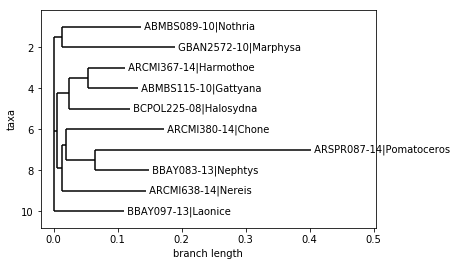

None


In [17]:
tree.rooted = False
Fig = Phylo.draw(tree)
print(Fig)

#### Generacion de linea de comando con MUSCLE

In [18]:
from Bio.Align.Applications import MuscleCommandline

In [19]:
cline2 = MuscleCommandline(input="Todasseq.fasta", out="Todasseq.txt")

In [20]:
print(cline2)

muscle -in Todasseq.fasta -out Todasseq.txt


In [21]:
!muscle -in Todasseq.fasta -out Todasseq.txt


MUSCLE v3.8.1551 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

Todasseq 10 seqs, lengths min 580, max 892, avg 662
00:00:00    23 MB(-5%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00    23 MB(-5%)  Iter   1  100.00%  K-mer dist pass 2
00:00:00    30 MB(-6%)  Iter   1  100.00%  Align node       
00:00:00    30 MB(-6%)  Iter   1  100.00%  Root alignment
00:00:00    30 MB(-6%)  Iter   2  100.00%  Refine tree   
00:00:00    30 MB(-6%)  Iter   2  100.00%  Root alignment
00:00:00    30 MB(-6%)  Iter   2  100.00%  Root alignment
00:00:00    30 MB(-6%)  Iter   3  100.00%  Refine biparts


In [22]:
align2 = AlignIO.read("Todasseq.txt", "fasta")

#### Gráfico de alineamiento con BioPython

In [23]:
print(align2)

SingleLetterAlphabet() alignment with 10 rows and 954 columns
--ATCTATATATTTTTATTTGGGAGCTTGAGCCGGAACCTGCGG...--- ARSPR087-14|Pomatoceros
--AACACTATACTTTATTCTAGGAGTCTGATCCGGCC-------...--- ARCMI380-14|Chone
--TACTTTATACTTCATTTTCGGCATGTGATCCGGCC-------...--- ARCMI638-14|Nereis
--------------------------------------------...GCT GBAN2572-10|Marphysa
--AACTCTTTATTTTATTTTTGGAACATGAGCGGGCC-------...--- BBAY083-13|Nephtys
--AACTCTTTACTTTATTTTTGGCACTTGGGGGGGCC-------...--- ABMBS089-10|Nothria
--CACACTATATTTTATTCTAGGTGTGTGGTCAGGAC-------...--- BBAY097-13|Laonice
GGTACTCTATATTTTATTTTTGGAACTTGATCAGGCT-------...--- BCPOL225-08|Halosydna
--CACCTTATATTTTATTTTTGGAACTTGGTCAGGTC-------...--- ARCMI367-14|Harmothoe
--CACCTTATATTTTATTTTTGGTACTTGATCAGGTC-------...--- ABMBS115-10|Gattyana


#### Gráfico de arbol generado por Clustalx con BioPython

In [25]:
tree2 = Phylo.read("tre.newick", "newick")
Phylo.draw_ascii(tree2)

                                 ___ ABMBS089_10_Nothria_conchylega_CMC02_...
                                |
                                |___ GBAN2572_10_Marphysa_brevitentaculata...
                                |
                                |___ BBAY097_13_Laonice_cirrata_COI_5P_MG4...
                                |
                               _|  , ABMBS115_10_Gattyana_cirrhosa_COI_5P_...
                              | | _|
                              | ,| | ARCMI367_14_Harmothoe_rarispina_COI_5...
                              | ||
                              | ||__ BCPOL225-08_Halosydna_brevisetosa_COI...
  ____________________________| |
 |                            | |___ ARCMI638_14_Nereis_pelagica_CMC03_COI...
 |                            | |
_|                            | |___ BBAY083_13_Nephtys_caeca_COI_5P_MG421078
 |                            |
 |                            |_____ ARCMI380_14_Chone_mollis_COI_5P_MG421022
 |
 |___________________

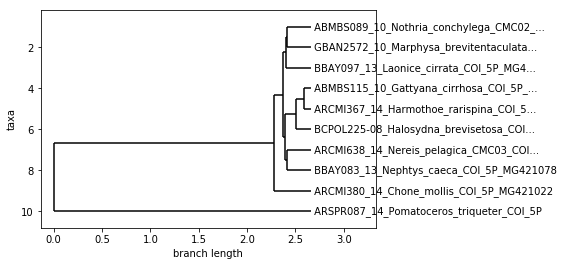

None


In [26]:
tree2.rooted = True
Fig2 = Phylo.draw(tree2)
print(Fig2)

### Análisis y Conclusiones

En términos de velocidad, ambos programas funcionan de manera equiparable, pero el resultado arrojado por cada uno si puede ser distinguible. En términos de precisión, el mejor alineamiento fue el generado por MUSCLE, pues el número de columnas, filas y gaps es menor al generado por Clustalw. Al revisar un poco en la literatura, es evidente que muchos de los investigadores prefieren usar MUSCLE en sus alineamientos, pues el algoritmo interno de Clustalw es un algoritmo iterativo, en el que los errores producidos en el paso anterior, son bastante improbables de corregir en un paso siguiente, mientras que MUSCLE implementa un algoritmo progresivo que permite re-optimizaciones de columnas durante todo el proceso de alineamiento.

La precisión demostrada por MUSCLE se ve también reflejada en la construcción del árbol filogenético. De ante mano, se conoce que las relaciones filogenéticas realizadas con un solo gen no representan completamente la relación evolutiva de las taxas en cuestión; sin embargo, para este caso vale la pena graficar el árbol resultante tras el alineamiento para comparar por ejemplo las diferencias en las distancias evolutivas entre cada especie. Como se puede apreciar en ambos árboles, tanto la distribución (taxones hermanos), como la distancia genética son muy diferentes en ambos árboles, por ejemplo la distancia generada por Clustalw es mucho menos (más de un orden de magnitud) con respecto a MUSCLE; estas diferencias como reflejo y consecuencia de la disparidad en los alineamientos per cada método.

Por las razones demostradas enteriormente, en este caso, y para estos datos, el mejor algoritmo de alineamiento de secuencia de ADN es MUSCLE.

### Referencias

Blake, J.A. y Hilbig, B. 1994. Taxonomic Atlas of the Santa Maria Basin and Western Santa Barbara Channel. Vol. 4. Annelida Part 1. Oligochaeta and Polychaeta (Phyllodocidae to Paralacydoniidae). Santa Barbara Museum of Natural History. 369 pp. 

Carr, C., Hardy, S., Brown, T., Macdonald, T., & Hebert, P. (2011). A Tri-Oceanic Perspective: DNA Barcoding Reveals Geographic Structure and Cryptic Diversity in Canadian Polychaetes. Plos ONE, 6(7), e22232.

Chenna, R., Sugawara, H., Koike, T., Lopez, R., Gibson, T. J., Higgins, D. G., & Thompson, J. D. (2003). Multiple sequence alignment with the Clustal series of programs. Nucleic acids research, 31(13), 3497-3500.

Grube, A.E. 1850. Die Familien der Anneliden. Archiv für Naturgeschichte, Berlin, 16(1): 249-364. 

Nygren, A. (2014). Cryptic polychaete diversity: a review. Zoologica Scripta,43(2), 172-183.

Edgar, R. C. (2004). MUSCLE: multiple sequence alignment with high accuracy and high throughput. Nucleic acids research, 32(5), 1792-1797.

Rouse G.W., Pleijel, F. 2001. Polychaetes. Oxford University Press Inc Oxford xii + 354 pp. 